In [11]:
#imports
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage import exposure, io
import math

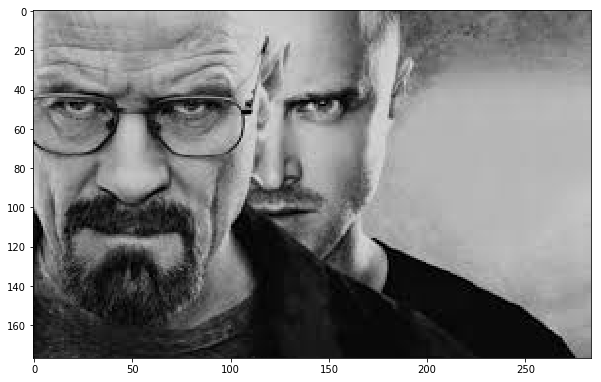

In [12]:
im = Image.open('download.jpg')
plt.figure(figsize=(10,10))
plt.imshow(im)

In [13]:
max = np.max(np.array(im))
max

229

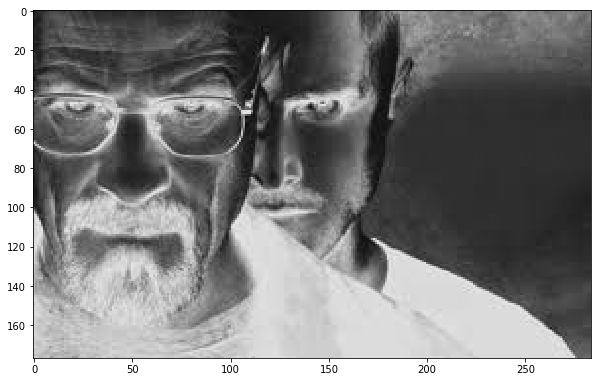

In [14]:
#negative by subtracting from max
im_t = im.point(lambda x: max-x)
plt.figure(figsize=(10,10))
plt.imshow(im_t)

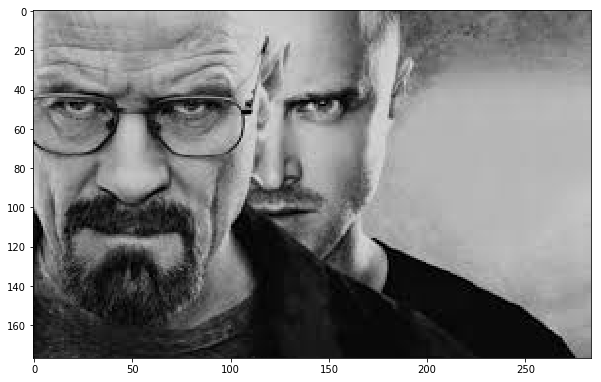

In [15]:
#converting to grayscale for log tranformation
im_g = im.convert('L')
plt.figure(figsize=(10,10))
plt.imshow(im_g, cmap='gray')

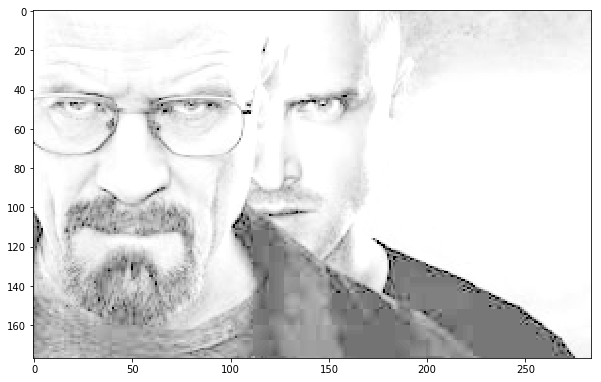

In [16]:

log_t_func = lambda c: lambda r: c*math.log(r+1)
im_tt = im_g.point(log_t_func(50)) #tranformation with c=50
plt.figure(figsize=(10,10))
plt.imshow(im_tt, cmap='gray')

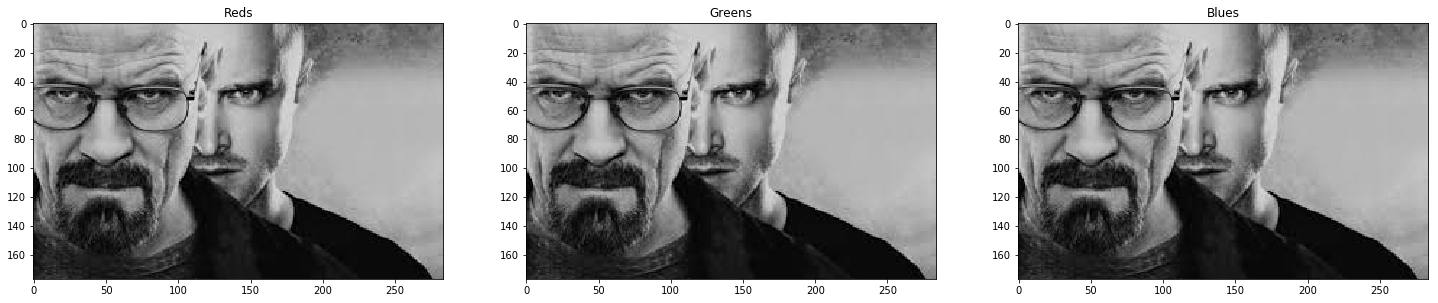

In [17]:
#splitting the channels of the image
r, g, b = im.split()
plt.figure(1, figsize=(25,15))
plt.subplot(131)
plt.title('Reds')
plt.imshow(r, cmap='Reds')
plt.subplot(132)
plt.title('Greens')
plt.imshow(g, cmap='Greens')
plt.subplot(133)
plt.title('Blues')
plt.imshow(b, cmap='Blues')
plt.show()

In [18]:
#flattening the image to plot it with matplotlib
r_i = np.array(r).flatten()
b_i = np.array(b).flatten()
g_i = np.array(g).flatten()

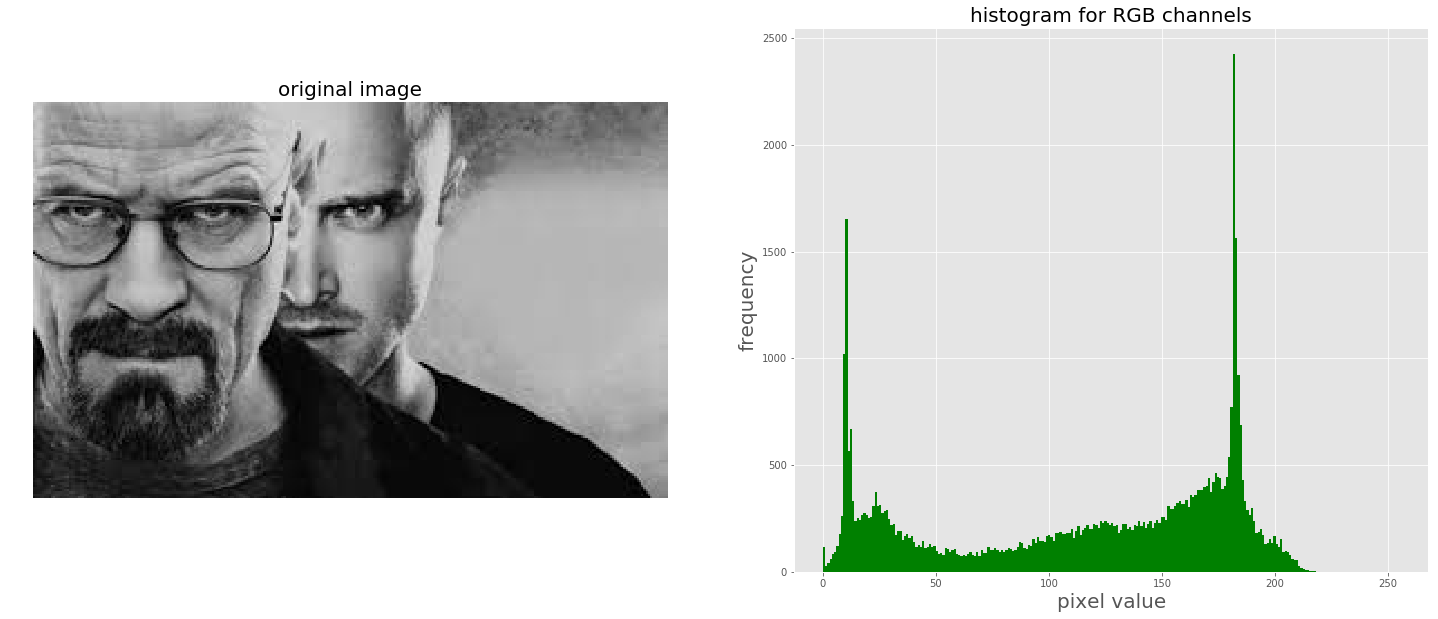

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(25,10))
plt.subplot(121)
plt.imshow(im, cmap='gray') 
plt.title('original image', size=20) 
plt.axis('off')
plt.subplot(122)
plt.hist(r_i, bins=256, range=(0,255), color='red')
plt.hist(b_i, bins=256, range=(0,255), color='blue')
plt.hist(g_i, bins=256, range=(0,255), color='green')
plt.xlabel('pixel value', size=20) 
plt.ylabel('frequency', size=20) 
plt.title('histogram for RGB channels', size=20)
plt.show()

### For input image, show 4 subplots: original image, its histogram, new image after equalization and its histogram plot.

C:\Users\Avinash\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


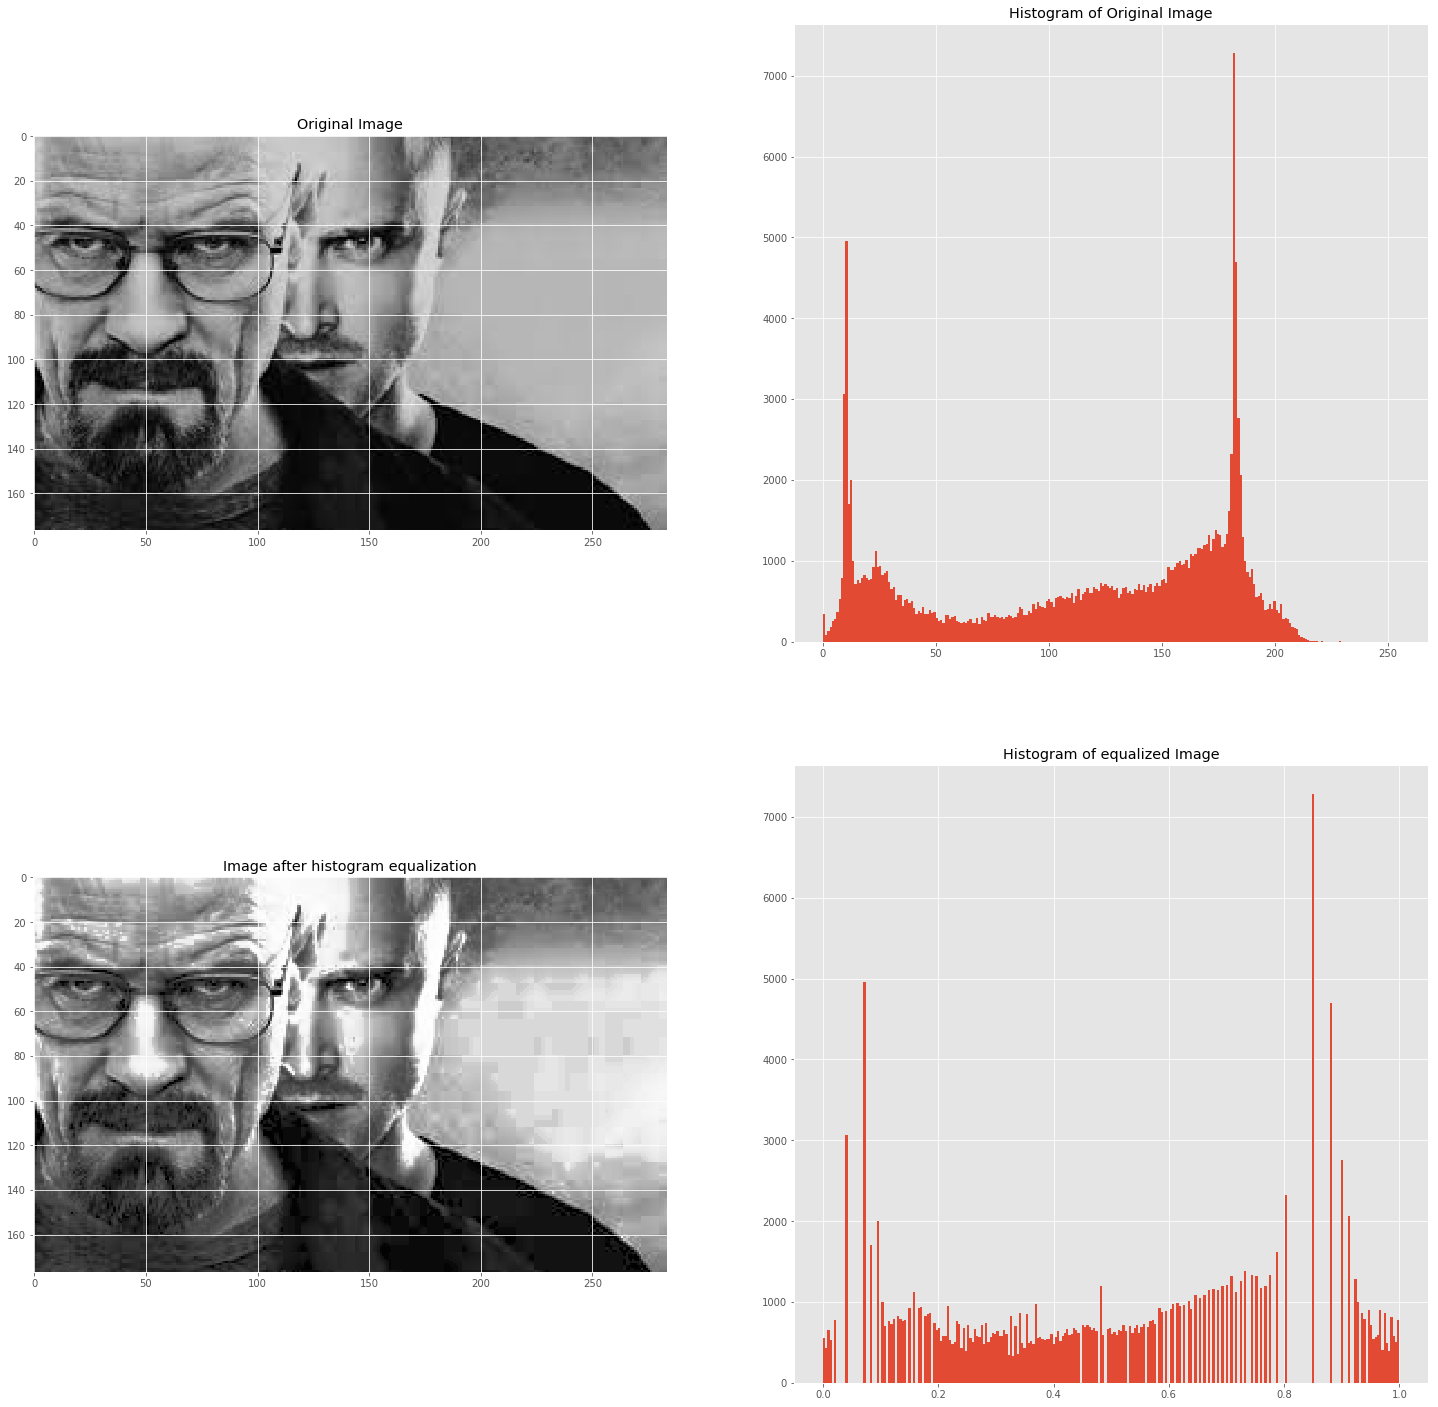

In [20]:
plt.figure(1, figsize=(25,25))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(im)
plt.subplot(222)
plt.title('Histogram of Original Image')
im_hist = np.array(im).flatten()
plt.hist(im_hist,bins=256, range=(0,255))
plt.subplot(223)
plt.title('Image after histogram equalization')
im_eq = exposure.equalize_hist(np.array(im))
plt.imshow(im_eq)
plt.subplot(224)
plt.title('Histogram of equalized Image')
im_eq_flt = np.array(im_eq).flatten()
plt.hist(im_eq_flt, bins=256, range=(0,1))
plt.show()

In [21]:
#enhancing the contrast by a factor of 2
im_c = ImageEnhance.Contrast(im)
im_enhanced = im_c.enhance(2)

In [22]:
#extracting out enhanced RGB
r_e, g_e, b_e = im_enhanced.split()
#unrolling to numpy array
r_e, g_e, b_e = np.array(r_e).flatten(), np.array(g_e).flatten(),np.array(b_e).flatten() 

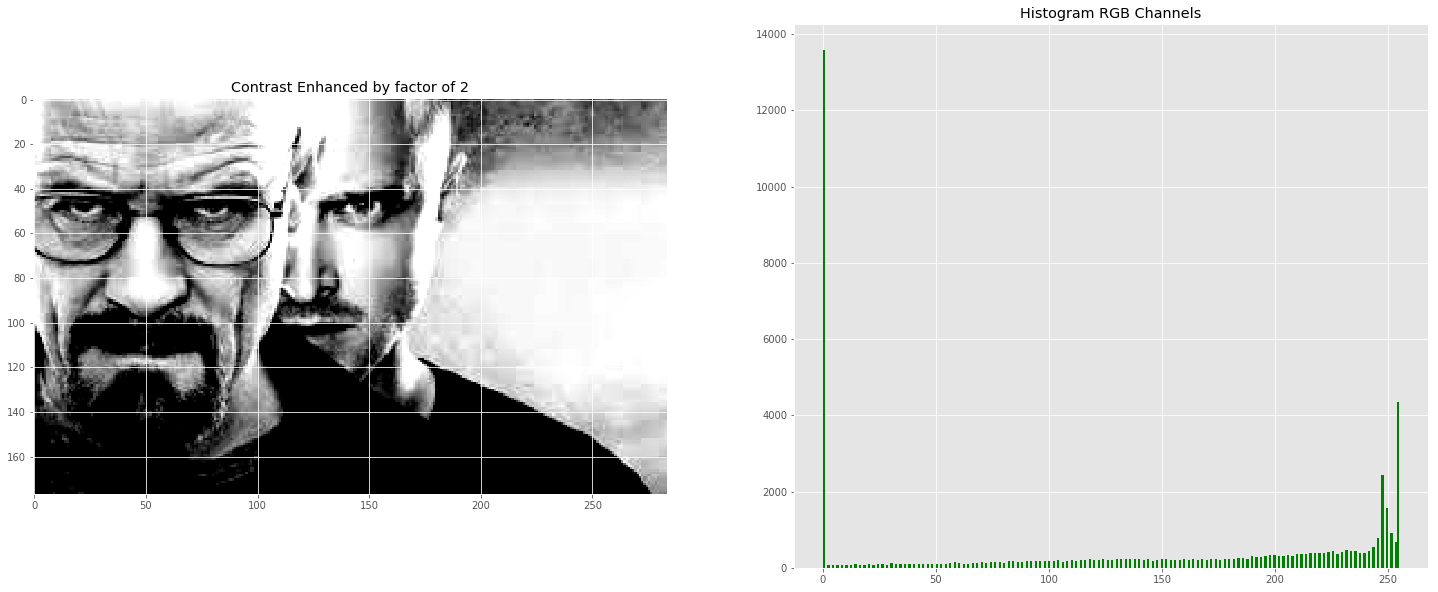

In [23]:
plt.figure(1, figsize=(25,10))
plt.subplot(121)
plt.title('Contrast Enhanced by factor of 2')
plt.imshow(im_enhanced)
plt.subplot(122)
plt.title('Histogram RGB Channels')
plt.hist(r_e, bins=256, range=(0,255), color='red')
plt.hist(g_e, bins=256, range=(0,255), color='blue')
plt.hist(b_e, bins=256, range=(0,255), color='green')
plt.show()